### Notes : environment for this assignment

You can choose to work on this assignment in any environment. We recommend you choose an interactive environment for executing commands and a text editor on the side for implementing classes.

Whether you're executing commands from **IPython** or **notebook**, you should first set the autoreload mode for imports. Use the following lines once at the beginning:

```python
%load_ext autoreload
%autoreload 2
```

In notebook, use `%matplotlib inline` to display images into your notebook rather than in a separate window.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Part 1: drawing instances of visual shape classes

We are going to develop a simple graphical interface to draw **visual shapes**. To begin, you will have to create different **shapes** that all fit into a common class description. Your shapes will be drawn on the screen using an existing class we will provide, called `SimpleGUI`.

Conceptually, a **shape** is defined as 1) some subspace of the screen and 2) a color.

The subspace is defined by a characteristic function `mu` on the screen grid: you can be either inside that surface or outside. Mathematically, this function would be defined as $\mu(x,y) \rightarrow \{True, False\}$.

The color is coded as a tuple of the form `(r,g,b)` that codes the rgb components each between 0 and 255.

So, as a synthesis, in python we will define a **shape** by:
- an **attribute** called `color` that is a tuple of the form `(r,g,b)` that codes the rgb components (between 0 and 255)
- a **method** called `mu`: takes two arguments `x` and `y` and tests if the point falls within the shape (returns True) or not (returns False).

The reasons why we choose to design those shapes as classes are:
- a shape object would contain everything needed to draw a shape ([https://en.wikipedia.org/wiki/Encapsulation_(computer_programming)](encapsulation))
- every shape, whether it is a circle, a rectangle, or something more complex, would fall into a unique template ([https://en.wikipedia.org/wiki/Polymorphism_(computer_science)](polymorphism))
- one can design a mechanism to draw, to generate, to process shapes without having to know how they work internally (encapsulation + [https://en.wikipedia.org/wiki/Separation_of_concerns](separation of concerns))


### Playing with `Circle`

1\. In a text editor, open file `shapes.py` and look at the example class `Circle`. As you can
see from the `__init__()` constructor method, a circle has four **attributes**. We will find the attribute :
- `color`: an `(r,g,b)` tuple as specified above.

And add three other:
- `cx`: the first coordinate of the center of the circle
- `cy`: the second coordinate of the center of the circle
- `radius`: the radius of the circle

Those attributes are used in the `.mu()` method to determine if points `(x,y)` is in or out this circle. Below, you'll find the code of that method `.mu()` of class `Circle`. Identify where `self.cx`,  `self.cy` and `self.radius` are used, and how this is used to produce a circle centered on coordinated `(cx,cy)` with the given `radius`.

```python
def mu(self, x, y):
    """Characteristic function of the shape.
    Returns True if (x,y) is inside the shape, else False.

    Parameters
    ----------
    x : int, x coordinate of a pixel
    y : int, y coordinate of a pixel

    Returns
    -------
    boolean : True or False whether (x,y) is within the shape.
    """
    t_dist = math.sqrt((x - self.cx)**2 + (y - self.cy)**2)
    return (t_dist < self.radius)
```

2\. In **`ipython`**, import class `Circle` from module `shapes`. Create an instance `circle1` centered on (100,100) with radius 50 and color (255, 0, 0). Type `circle1` in `ipython` to display the content of `circle1`, you should see something like:

```
<areas.Circle instance at 0x103f61cb0>
```

the last value starting with `0x` should be different. It corresponds to the index of your instance in memory.

In [2]:
from shapes import Circle

circle1 = Circle(100, 100, 50, (255, 0, 0)) 

print(circle1)

3\. Use method `.mu()` of `circle1` to check if points at coordinates `(0,0)`, `(100,70)`, `(300,20)` are in or out `circle1`

In [3]:
print(circle1.mu(0, 0))
print(circle1.mu(100, 70))
print(circle1.mu(300, 20))

False
True
False


### Testing the `gui`

4\. We will now test our drawing engine. Import class `SimpleGUI` from the provided module `simplegui`. Create an instance of that class called `gui`. Use method `gui.test()` to test your instance. It should display the image below (in a separate window or within your notebook).

<img src="img/gui_test.png" width=320/>

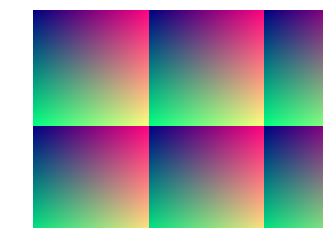

In [4]:
from simplegui import SimpleGUI

gui = SimpleGUI()
gui.test()

5\. We are now going to draw `circle1`. Create an empty `list` that you call `shapelist` and put `circle1` into that list. Use `gui.draw()` to draw `shapelist`. It should display as below.

**Note**: `x` and `y` are defined as coordinates of pixels on a computer screen. Then `x` increase from left to right, and `y` increase from top to bottom.

<img src="img/gui_draw_circle1.png" width=320/>

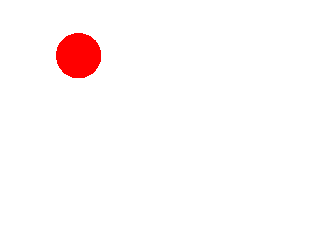

In [5]:
shape_list = []
shape_list.append(circle1)
gui.draw(shape_list)

### Creating instances of the `Circle` class

6\. Create two new instances of `Circle` with the following parameters:

- instance `circle2`: centered on (200, 100) with radius 70 and color (0, 255, 0)
- instance `circle3`: centered on (100, 200) with radius 10 and color (0, 0, 255)

Add those two instances to `shapelist` and use `gui.draw()` to display the result. It should display as below.

<img src="img/gui_draw_circle123.png" width=320/>

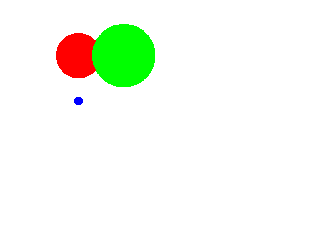

In [6]:
circle2 = Circle(200, 100, 70, (0, 255, 0))
circle3 = Circle(100, 200, 10, (0, 0, 255))
shape_list.append(circle2)
shape_list.append(circle3)
gui.draw(shape_list)

7\. Now, if you execute the following lines:

```python
circle1.cx = 300
gui.draw(shapelist)
```

What do you think will happen? Will it display the same result as before? A different one? an error message?

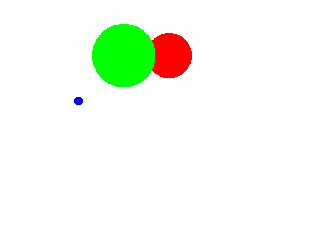

In [7]:
circle1.cx = 300
gui.draw(shape_list)

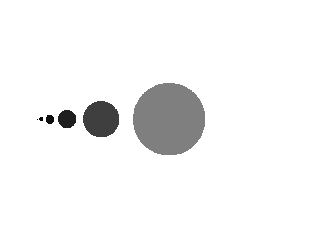

In [8]:
shape_list = []
n = 10
f = 1.0

for i in range(n):
    f = f/2
    c = int(255*f)
    shape_list.append(Circle(int(600*f), 240, int(f*640/4), (c,c,c)))

gui.draw(shape_list)

### Create another shape class `Rectangle`

**In file `shapes.py` you will find a template for a new class `Rectangle`.**

8\. Use the template to code a `Rectangle` class, as defined by four coordinates `x0,y0,x1,y1` that form the upper left corner (`x0,y0`) and the lower right corner (`x1,y1`) of the rectangle, plus a `color`, as long as function `.mu()` returning True inside the rectangle and False outside.

9\. Test your `Rectangle` class by creating an instance with the following parameters:
- `x0 = 10`
- `y0 = 50`
- `x1 = 100`
- `y1 = 200`
- `color = (255,0,255)`

When using `gui.draw()` with a list made of that instance, it should display as below:

<img src="img/gui_draw_rect1.png" width=320/>

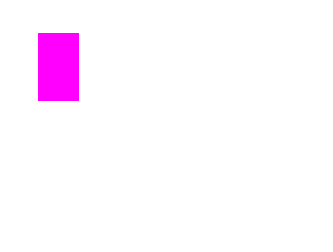

In [9]:
from shapes import Rectangle

rect1 = Rectangle(10, 50, 100, 200, (255, 0, 255))

shape_list = []
shape_list.append(rect1)
gui.draw(shape_list)

# Part 2: union, intersection, difference classes

In this part we will create classes that represent set operations between the shapes we just have created. Namely, we will design union, intersection and difference between two shapes `shape_a` and `shape_b` as specified:

**`UnionShape`**:
- it will have as an attribute both input shapes `shape_a` and `shape_b`,
- its `.mu()` will compute the set union of `shape_a.mu()` and `shape_b.mu()` : it will return true on points that belong to `shape_a` or to `shape_b`
- and its color will be the average of color components of `shape_a.color` and `shape_b.color`.

**`IntersectionShape`**:
- it will have as an attribute both input shapes `shape_a` and `shape_b`,
- its `.mu()` will compute the set intersection of `shape_a.mu()` and `shape_b.mu()` : it will return true for points that belong both to `shape_a` and to `shape_b`
- and its color will be the average of color components of `shape_a.color` and `shape_b.color`.

**`DiffShape`**:
- it will have as a attribute both input shapes `shape_a` and `shape_b`,
- its `.mu()` will compute the set difference between `shape_a.mu()` and `shape_b.mu()` : it will return true on points that belong to `shape_a` but not to `shape_b`
- and its color will be the color of a (`shape_a.color`).

You will find the template for these three classes inside the file `operators.py`.

### Designing a test case for our operations

1\. Use the following lines to create 8 circles, from `circle1` to `circle8`.

```python
circle1 = Circle(100, 100, 50, (255, 0, 0))
circle2 = Circle(150, 100, 50, (0, 0, 255))

circle3 = Circle(300, 100, 50, (255, 0, 0))
circle4 = Circle(350, 100, 50, (0, 0, 255))

circle5 = Circle(100, 300, 50, (255, 0, 0))
circle6 = Circle(150, 300, 50, (0, 0, 255))

circle7 = Circle(300, 300, 50, (255, 0, 0))
circle8 = Circle(350, 300, 50, (0, 0, 255))

shapelist = [circle1, circle2,
            circle3, circle4,
            circle5, circle6,
            circle7, circle8]

gui.draw(shapelist)
```

It should display the following result:

<img src="img/gui_draw_circle12345678.png" width=320/>

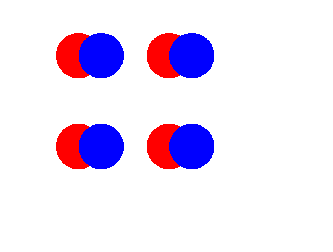

In [10]:
circle1 = Circle(100, 100, 50, (255, 0, 0))
circle2 = Circle(150, 100, 50, (0, 0, 255))

circle3 = Circle(300, 100, 50, (255, 0, 0))
circle4 = Circle(350, 100, 50, (0, 0, 255))

circle5 = Circle(100, 300, 50, (255, 0, 0))
circle6 = Circle(150, 300, 50, (0, 0, 255))

circle7 = Circle(300, 300, 50, (255, 0, 0))
circle8 = Circle(350, 300, 50, (0, 0, 255))

shape_list = [circle1, circle2,
            circle3, circle4,
            circle5, circle6,
            circle7, circle8]

gui.draw(shape_list)

You can test your implementation of UnionShape, IntersectionShape and DiffShape using the following segment:

```python
op12 = UnionShape(circle1, circle2)
op34 = IntersectionShape(circle3, circle4)
op56 = DiffShape(circle5, circle6)
op78 = UnionShape(DiffShape(circle7, circle8), DiffShape(circle8, circle7))

shapelist = [op12, op34, op56, op78]

gui.draw(shapelist)
```

With `circle1,...,circle8` defined previously, you should expect the following result:

<img src="img/gui_draw_op12345678.png" width=320/>

In [11]:
from operators import UnionShape
from operators import IntersectionShape
from operators import DiffShape

op12 = UnionShape(circle1, circle2)
op34 = IntersectionShape(circle3, circle4)
op56 = DiffShape(circle5, circle6)
op78 = UnionShape(DiffShape(circle7, circle8), DiffShape(circle8, circle7))

shape_list = [op12, op34, op56, op78]

gui.draw(shape_list)

TypeError: integer argument expected, got float

# Part 3: creating shape scripts with a shape factory

You will now have to create a scripting language for creating beautiful (?) shapes. You will read commands for creatings shapes from a text file. The idea is to parse that file line by line and, for each line, to create the corresponding object.


## 3.1. Scripting circles and rectangles

1\. Open file `scripts/shapescript1.txt`:

```
circle1,circle,100,100,50,255,0,0
circle2,circle,150,100,50,0,0,255
rectangle1,rectangle,10,50,100,200,255,0,255
```

Each of these lines contains comma-separated values that code all the information needed to create a shape. We will start by parsing the lines for creating `Circle` and `Rectangle`, providing values depending on the type of the shape:

| type | values |
| :-: | :-- |
| `Circle` | `key,type,x,y,radius,red,green,blue` |
| `Rectangle` | `key,type,x1,y1,x2,y2,red,green,blue` |

* `key` is intented to be the name of the shape, so that we can store and recall it.
* `type` is `'circle'` for creating a `Circle`, `'rectangle'` for creating a `Rectangle`.


2\. In `shapescriptparser.py` you'll find the template of a class `ShapeScriptParser` that will read such a file and create the corresponding shapes (for the moment only circles and rectangles). Use the docstrings in that file to implement the corresponding behavior. When executing it with the following code:

```
sf = ShapeScriptParser(gui)
sf.parse('scripts/shapescript1.txt')
sf.draw()
```

it should display the image below.

<img src="img/gui_shapescript1.png" width=320/>

<details>
  <summary>**Hint/Spoiler Alert**: We would prefer you to try designing that class on your own, but if you feel lost at this point, **click on this** to see a list of steps you could take to design your code.</summary>
- Decide what structure you would use as a register to store/remember shapes in `ShapeScriptParser` so that you can recall shapes by their `key` later?<br/>
- Add some temporary code in `parse()` that just creates some test shapes like in **Part 1** (no parsing the file at all) and stores them in that register.<br/>
- Implement method `draw()` to pull shapes from the register and draws them using `gui`.<br/>
- Use the code above to test the general behavior of your register.<br/>
<br/>
Now you have the necessary environment to test your class. Try to move forward on on your own.
</details>

<br/>

<details>
  <summary>**Hint/Spoiler level 2**: If you need assistance for the next steps, **click on this** to see a 2nd list of steps you could take to design your code.</summary>
- Implement method `parse()` to call `parse_line()` for every line.<br/>
- Implement method `parse_line()` to create `Circle` when 2nd field of the line is `circle`, unpack the rest of the line to obtain arguments necessary to create a `Circle`. If the 2nd field is different from `circle`, print an error message.<br/>
- Test that using your `draw()` method.<br/>
- Modify the implementation of that function to create a `Rectangle` when the 2nd field is `rectangle`, unpack the arguments specific to a `Rectangle`.
</details>

In [ ]:
from shapescriptparser import ShapeScriptParser

sp = ShapeScriptParser(gui)
sp.parse('scripts/shapescript1.txt')
sp.draw()

## 3.2. Scripting unions, intersections and differences

Now we will add some other commands into our script, for handling the creation of `UnionShape`, `IntersectionShape` and `DiffShape`.

1\. Open file `scripts/shapescript2.txt`:

```
circle1,circle,100,100,50,255,0,0
circle2,circle,150,100,50,0,0,255
circle3,circle,300,100,50,255,0,0
circle4,circle,350,100,50,0,0,255
circle5,circle,100,300,50,255,0,0
circle6,circle,150,300,50,0,0,255
circle7,circle,300,300,50,255,0,0
circle8,circle,350,300,50,0,0,255
union1,union,circle1,circle2
inter2,intersection,circle3,circle4
diff1,difference,circle5,circle6
diff2,difference,circle7,circle8
diff3,difference,circle8,circle7
eye,union,diff2,diff3
```

You will recognize a text version of the test case used in **Part 2**. This time we will add commands for the following types:

Each of these lines contains comma-separated values that code all the informations needed to create a shape. We start by circles and rectangles, providing values depending on the type of the shape:

| type | values |
| :-: | :-- |
| `UnionShape` | `key,type,keyA,keyB` |
| `IntersectionShape` | `key,type,keyA,keyB` |
| `DiffShape` | `key,type,keyA,keyB` |

* `key` is intented to be the name of the new shape.
* `type` is `'union'` for creating a `UnionShape`, `'intersection'` for creating an `IntersectionShape`, and `'difference'` for creating a `DiffShape`.
* `keyA` and `keyB` are the keys to the shapes, previously created, used as arguments to create this union/intersection/difference.

2\. Modify `shapescriptparser.py` and its method `parse_line()` to take into account these three new types of classes. When executing it with the following code:

```
sf = ShapeScriptParser(gui)
sf.parse('scripts/shapescript2.txt')
sf.draw()
```

it should display the image below.

<img src="img/gui_shapescript2.png" width=320/>

In [ ]:
sp = ShapeScriptParser(gui)
sp.parse('scripts/shapescript2.txt')
sp.draw()

3\. Use your function against file `'scripts/shapescript3.txt'`, what do you notice?

In [ ]:
sp = ShapeScriptParser(gui)
sp.parse('scripts/shapescript3.txt')
sp.draw()

# Extra Credit

If you have finished this assignment early, here are a couple of interesting ideas to add to your implementation.

## Idea 1: the "z" factor

Look back at the result obtained in part 2.1 and part 3.2.2 (see images below). Where does this difference come from? What changes should you make to your scripting languages (arguments) and to `ShapeScriptParser` so that these results are identical?

| result of part 2 | result of part 3 |
| :-: | :-: |
| <img src="img/gui_draw_op12345678.png" width=320/> | <img src="img/gui_shapescript2.png" width=320/> |

Create a script of your own to test that proposition, and modify `ShapeScriptParser` accordingly.

## Idea 2: geometric transformations

Design three other classes `Translation`, `Scaling` and `Rotation` that implement these respective mathematical operations.

Each would be constructed by taking one input shape, and transforming it according to given parameters. For instance, for `Translation`, use two values `xshift` and `yshift` indicating the vector for translating.

Add those classes to your scripting language and have fun creating art of your own !

## Idea 3: transparency

This idea is fairly simple: "implement transparency so that a shape can be more or less translucid and we can see through it". But the implementation requires some thinking and refactoring.

Try to imagine how you would do that. In particular, which objects would you need to modify to implement that? Would you need to modify `simplegui.py`? How?